In [1]:
import numpy as np
import rasterio
from rasterio.plot import show
from osgeo import gdal
import geopandas

In [2]:
dataset = rasterio.open('./soil_moisture.tif')
print('Count -> ', dataset.count, '\nWidth -> ', dataset.width, '\nHeight -> ', dataset.height)

Count ->  1 
Width ->  777 
Height ->  505


### PLOT DataSet

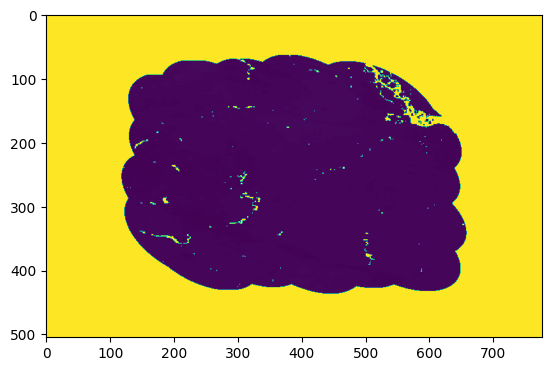

<Axes: >

In [3]:
array = dataset.read(1)
show(array)

### MetaData Dataset

In [4]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 777,
 'height': 505,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.002083333, 0.0, 29.566633136000007,
        0.0, -0.002083333, 50.486672568)}

### Cut Soil_Mosture using Polygon

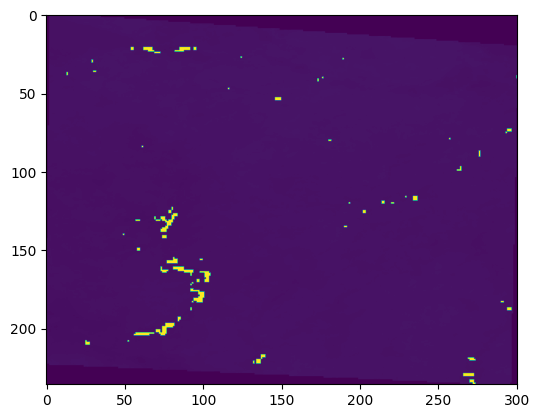

<Axes: >

In [5]:
inFile = './soil_moisture.tif'
shpin = "D:/GIS/polygon.geojson"
OutDS = "./soil.tif"


result = gdal.Warp(OutDS, inFile, cutlineDSName=shpin, cropToCutline = True)

dataset2 = rasterio.open('./soil.tif')
array2 = dataset2.read(1)
show(array2)

### tif to jpeg

In [6]:
gdal.Translate('./soil.jpg', OutDS, format='JPEG')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000020CE0476940> >

### Rand 2 Pixels With CRS: 3857

In [7]:
import random

newArray = array2.copy()

with rasterio.open(
        "./new.tif",
        mode="w",
        driver="GTiff",
        height=dataset2.shape[0],
        width=dataset2.shape[1],
        count=1,
        dtype=newArray.dtype,
        crs=3857,
        transform=dataset2.transform,
) as new_dataset:
        new_dataset.write(newArray, 1)

dataset3 = rasterio.open('./new.tif')
print('center ->', dataset3.xy(dataset3.height // 2, dataset3.width // 2), 'rand pixel ->', dataset3.xy(random.uniform(30.05, 30.6), random.uniform(49.8, 50.2)))

center -> (30.361424675500007, 49.9835476485) rand pixel -> (30.15283534049625, 50.166213636182306)
